## import necessary libaries

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary_data_train = pd.read_csv('SalaryData_Train(1).csv')
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_data_test = pd.read_csv('SalaryData_Test(1).csv')
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data understanding(train data)

In [5]:
salary_data_train.shape

(30161, 14)

In [6]:
salary_data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_data_train2 = salary_data_train.copy()

## Label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
salary_data_train2['workclass']     = le.fit_transform(salary_data_train2['workclass'])
salary_data_train2['education']     = le.fit_transform(salary_data_train2['education'])
salary_data_train2['maritalstatus'] = le.fit_transform(salary_data_train2['maritalstatus'])
salary_data_train2['occupation']    = le.fit_transform(salary_data_train2['occupation'])
salary_data_train2['relationship']  = le.fit_transform(salary_data_train2['relationship'])
salary_data_train2['race']          = le.fit_transform(salary_data_train2['race'])
salary_data_train2['sex']           = le.fit_transform(salary_data_train2['sex'])
salary_data_train2['native']        = le.fit_transform(salary_data_train2['native'])
salary_data_train2['Salary']        = le.fit_transform(salary_data_train2['Salary'])

In [12]:
salary_data_train2.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [13]:
X_train = salary_data_train2.drop('Salary',axis=1)
y_train = salary_data_train2[['Salary']]

In [14]:
X_train.shape,y_train.shape

((30161, 13), (30161, 1))

## Standard Scalar

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
std_scale = StandardScaler()
scaled_X_train = std_scale.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)

In [17]:
scaled_X_train.std()

age              1.000017
workclass        1.000017
education        1.000017
educationno      1.000017
maritalstatus    1.000017
occupation       1.000017
relationship     1.000017
race             1.000017
sex              1.000017
capitalgain      1.000017
capitalloss      1.000017
hoursperweek     1.000017
native           1.000017
dtype: float64

In [18]:
scaled_X_train.mean()

age              2.137108e-16
workclass       -3.209196e-16
education        2.970319e-16
educationno      1.177916e-18
maritalstatus    6.709117e-16
occupation      -1.162552e-15
relationship    -5.062979e-16
race             1.266805e-15
sex             -4.574438e-16
capitalgain     -7.477192e-16
capitalloss      1.384438e-16
hoursperweek    -2.469272e-16
native           7.985905e-17
dtype: float64

## Data understanding(test_data)

In [19]:
salary_data_test.shape

(15060, 14)

In [20]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
salary_data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [22]:
salary_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [23]:
salary_data_test2 = salary_data_test.copy()

## Label encoding

In [24]:
le = LabelEncoder()
salary_data_test2['workclass']     = le.fit_transform(salary_data_test2['workclass'])
salary_data_test2['education']     = le.fit_transform(salary_data_test2['education'])
salary_data_test2['maritalstatus'] = le.fit_transform(salary_data_test2['maritalstatus'])
salary_data_test2['occupation']    = le.fit_transform(salary_data_test2['occupation'])
salary_data_test2['relationship']  = le.fit_transform(salary_data_test2['relationship'])
salary_data_test2['race']          = le.fit_transform(salary_data_test2['race'])
salary_data_test2['sex']           = le.fit_transform(salary_data_test2['sex'])
salary_data_test2['native']        = le.fit_transform(salary_data_test2['native'])
salary_data_test2['Salary']        = le.fit_transform(salary_data_test2['Salary'])

In [25]:
salary_data_test2.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [26]:
X_test = salary_data_test2.drop('Salary',axis=1)
y_test = salary_data_test2[['Salary']]

In [27]:
X_test.shape,y_test.shape

((15060, 13), (15060, 1))

## Standard Scalar

In [28]:
scaled_X_test = std_scale.fit_transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [29]:
scaled_X_test.std()

age              1.000033
workclass        1.000033
education        1.000033
educationno      1.000033
maritalstatus    1.000033
occupation       1.000033
relationship     1.000033
race             1.000033
sex              1.000033
capitalgain      1.000033
capitalloss      1.000033
hoursperweek     1.000033
native           1.000033
dtype: float64

In [30]:
scaled_X_test.mean()

age              2.459373e-16
workclass        1.457577e-15
education       -8.307505e-17
educationno      7.519439e-18
maritalstatus   -1.662474e-15
occupation       1.500202e-16
relationship     1.517600e-16
race             2.065782e-16
sex              9.168850e-16
capitalgain     -1.014992e-15
capitalloss     -7.571043e-16
hoursperweek     1.909200e-16
native           1.896845e-15
dtype: float64

## Model Training | Testing | Evaluation

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,plot_confusion_matrix

accuracy score          : 0.8465
precision score         : 0.7592
recall score            : 0.5497


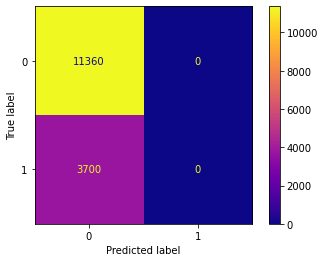

In [35]:
svm_model = SVC()
svm_model.fit(scaled_X_train,y_train)
y_pred = svm_model.predict(scaled_X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
plot_confusion_matrix(svm_model,X_test,y_test,cmap='plasma')
plt.show()

## Tune SVM using gridsearch cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
grid_cv = GridSearchCV(estimator=svm_model,param_grid={
    'kernel':['linear', 'poly', 'rbf'],
    'degree':range(1,3),
    'C'     :range(1,3)
})
grid_cv.fit(scaled_X_train,y_train)

accuracy score          : 0.8093
precision score         : 0.7706
recall score            : 0.3186


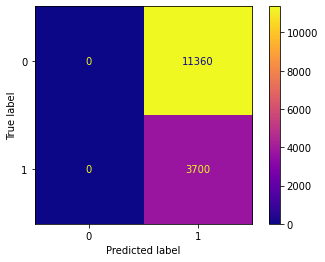

CPU times: user 39.6 s, sys: 216 ms, total: 39.8 s
Wall time: 39.5 s


In [38]:
%%time
svm_model = SVC(kernel='linear')
svm_model.fit(scaled_X_train,y_train)
y_pred = svm_model.predict(scaled_X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
plot_confusion_matrix(svm_model,X_test,y_test,cmap='plasma')
plt.show()

accuracy score          : 0.8406
precision score         : 0.7565
recall score            : 0.5181


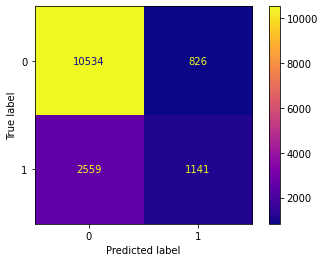

CPU times: user 33.4 s, sys: 111 ms, total: 33.5 s
Wall time: 33.4 s


In [56]:
%%time
svm_model = SVC(kernel='poly')
svm_model.fit(scaled_X_train,y_train)
y_pred = svm_model.predict(scaled_X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
plot_confusion_matrix(svm_model,X_test,y_test,cmap='plasma')
plt.show()